# Random Forest Modle<br>
ECS171 Group 19<br>
Zherui Xie

### I.Import Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
class Reader:
    def __init__(self, path, mode='f'):
        
        self.df = self.wrapper(path,mode)
    
    # read arff file
    def readarff(self, filename,collect=True): #collect if you need to collect attribute names
        with open(filename) as f:
            content = f.read().splitlines()
        data = False
        metalist = [] # storets metadata as list of rows
        datalist = [] # store data as list of rows
        
        # read data line-by-line
        for line in content:
            if data == True:
                line = line.split(",")
                datalist.append(line)
            elif line == "@data":
                data = True # read lines before "@data" as metadata and after as data
            else:
              # clean up metadata header
              if collect:
                line = line.replace(' "', ".")
                line = line.replace('" ', ".")
                line = line.replace(" ","")
                line = line.split(".")
                if len(line)==3: #ignore first two lines of file
                    line = line[1:3] #remove repetitive "@attribute"
                    metalist.append(line)
        
        # create dataframes from lists of rows
        if not collect:
            dataframe = pd.DataFrame(datalist,dtype=float)
            return dataframe
        else:
            dataframe = pd.DataFrame(datalist,dtype=float)
            metaframe = pd.DataFrame(metalist,columns=["attribute","description"])
            attributes = metaframe["attribute"].rename("SAMPLE")
            return dataframe, attributes
    
    def readdirectory(self, path,quiet=False): # make sure path ends in a slash
        alldata = []
        count = 0
        for filename in os.listdir(path):
            if filename.endswith(".arff"):
                if count == 0: #only collect attributes once
                    if not quiet:
                          print("processing "+filename+"; collecting attribute names")
                    dataframe, attributes = self.readarff(path+filename)
                    alldata.append(dataframe)
                else:
                    if not quiet:
                        print("processing "+filename)
                    dataframe = self.readarff(path+filename,collect=False)
                    alldata.append(dataframe)
                count += 1
                continue
            else:
                continue
        if not quiet:
            print("Concatenating data")
        alldata = pd.concat(alldata).reset_index(drop=True) #reset indices so it is continuous
        alldata.columns = attributes #assign column names
        return alldata
    
    def wrapper(self, path, mode='f'):
        if mode == 'f':
            try:
                df =  self.readarff(path, collect = True)
                return df
            except:
                print("make sure you inputted the correct arff FILE path")
        elif mode == 'd':
            try:
                df =  self.readdirectory(path, quiet=True)
                return df
            except:
                print("make sure you inputted the correct arff DIRECTORY path, ending with a slash")
        else:
            print("mode must either be 'f' or 'd'")
            return 0

In [2]:
path="./phone_accel/"
phone_accel=Reader(path,mode='d').df
phone_accel

SAMPLE,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,A,0.060,0.110,0.215,0.255,0.240,0.070,0.030,0.010,0.005,...,0.550898,0.543819,0.751094,-0.005809,-0.376951,0.383184,0.377359,-0.103380,10.74990,1610.0
1,A,0.050,0.130,0.170,0.220,0.285,0.090,0.020,0.020,0.010,...,0.545153,0.538148,0.741898,0.069865,-0.368142,0.361264,0.488030,-0.070615,10.86330,1610.0
2,A,0.070,0.135,0.165,0.250,0.190,0.130,0.025,0.015,0.010,...,0.580717,0.573254,0.689070,0.227904,-0.299957,0.255459,0.568801,-0.134642,10.97220,1610.0
3,A,0.075,0.145,0.140,0.205,0.275,0.105,0.010,0.025,0.020,...,0.578014,0.570586,0.686601,0.244267,-0.280844,0.259784,0.567380,-0.128378,10.98140,1610.0
4,A,0.085,0.145,0.145,0.175,0.285,0.100,0.030,0.020,0.005,...,0.568111,0.560811,0.700471,0.057924,-0.399338,0.311718,0.398679,-0.245695,10.87960,1610.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23069,S,0.085,0.870,0.045,0.000,0.000,0.000,0.000,0.000,0.000,...,0.301115,0.297245,0.819750,0.843326,0.885157,-0.240015,0.404147,-0.194501,9.86525,1623.0
23070,S,0.045,0.930,0.025,0.000,0.000,0.000,0.000,0.000,0.000,...,0.250726,0.247505,0.882858,0.843529,0.924976,-0.375267,0.105853,-0.347694,9.83254,1623.0
23071,S,0.115,0.850,0.035,0.000,0.000,0.000,0.000,0.000,0.000,...,0.314565,0.310523,0.846374,0.783956,0.816690,-0.096962,0.283083,-0.055892,9.85928,1623.0
23072,S,0.085,0.850,0.060,0.005,0.000,0.000,0.000,0.000,0.000,...,0.353186,0.348647,0.739531,0.765779,0.813776,0.034647,0.414515,-0.073013,9.88992,1623.0


In [3]:
phone_accel.shape

(23074, 93)

### II. Process Data

In [4]:
# remove ACTIVITY, RESULTANT, MFCC values, COS values, and CORRELATION values
x = np.array(phone_accel[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'Y0', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Z0', 'Z1',
       'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'XAVG', 'YAVG', 'ZAVG',
       'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV',
       'XSTANDDEV', 'YSTANDDEV', 'ZSTANDDEV', 'XVAR', 'YVAR', 'ZVAR', 'RESULTANT']])
y = np.array(phone_accel["ACTIVITY"])
y

array(['A', 'A', 'A', ..., 'S', 'S', 'S'], dtype=object)

In [5]:
# Split dataset into 70% training and 30% testing.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3)

### III. Train Data

In [19]:
from sklearn.ensemble import RandomForestClassifier
X = []
Y = []
for i in range(1,21):
    count = 100 * i
    X += [count]
    clf=RandomForestClassifier(n_estimators=count)
    clf.fit(x_train,y_train)
    Y += [clf.score(x_test,y_test)]
    print('n_estimators =',count,'---->','accuracy =',clf.score(x_test,y_test))

n_estimators = 100 ----> accuracy = 0.8473205257836198
n_estimators = 200 ----> accuracy = 0.8480427560306225
n_estimators = 300 ----> accuracy = 0.8484760941788242
n_estimators = 400 ----> accuracy = 0.847609417882421
n_estimators = 500 ----> accuracy = 0.8490538783764264
n_estimators = 600 ----> accuracy = 0.8486205402282248
n_estimators = 700 ----> accuracy = 0.846598295536617
n_estimators = 800 ----> accuracy = 0.8474649718330204
n_estimators = 900 ----> accuracy = 0.8490538783764264
n_estimators = 1000 ----> accuracy = 0.8474649718330204
n_estimators = 1100 ----> accuracy = 0.8480427560306225
n_estimators = 1200 ----> accuracy = 0.8486205402282248
n_estimators = 1300 ----> accuracy = 0.8496316625740286
n_estimators = 1400 ----> accuracy = 0.8496316625740286
n_estimators = 1500 ----> accuracy = 0.849487216524628
n_estimators = 1600 ----> accuracy = 0.8478983099812221
n_estimators = 1700 ----> accuracy = 0.849487216524628
n_estimators = 1800 ----> accuracy = 0.8499205546728297
n_est

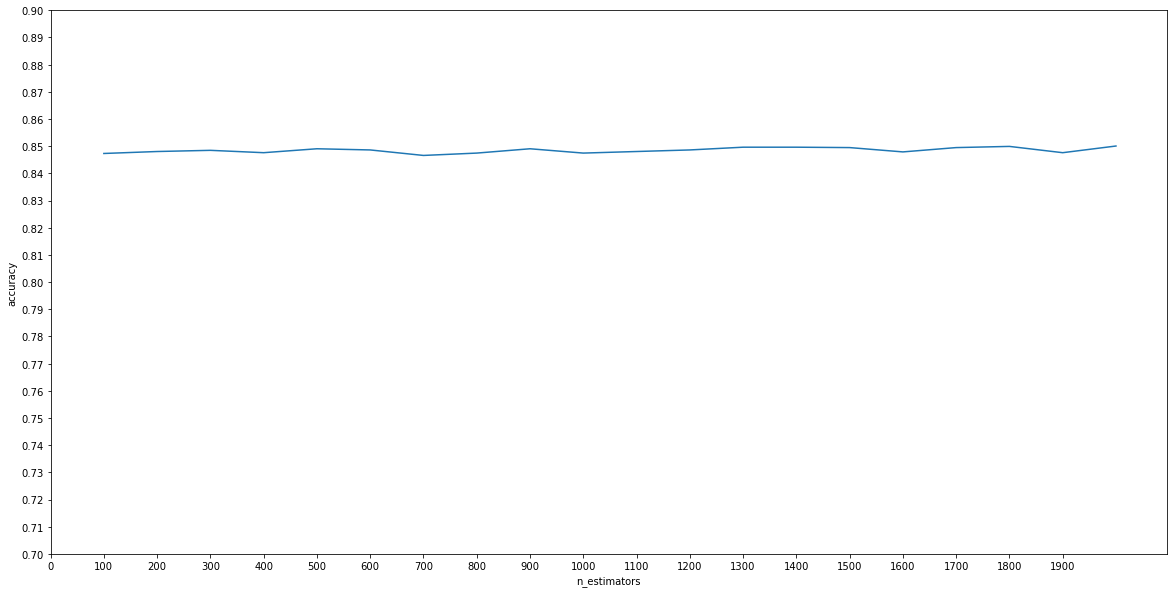

In [32]:
plt.figure(figsize = (20,10))
plt.plot(X,Y)
plt.yticks(np.arange(0.7, 0.9, step=0.01))
plt.xticks(range(0,2000,100))
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

### IV. Evaluate Data

In [33]:
#Mesure the mean accuracy
print("accuracy:",clf.score(x_test,y_test))

accuracy: 0.8500650007222302


In [34]:
y_predict=clf.predict(x_test)

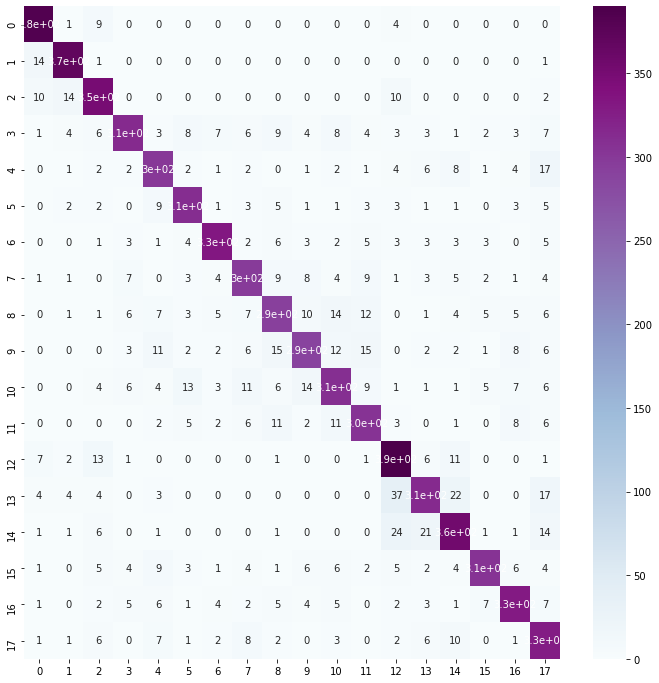

In [35]:
cm=confusion_matrix(y_test,y_predict)
plt.figure(figsize=(12,12))
sn.heatmap(cm,annot=True,cmap="BuPu")
plt.show()

### 

In [39]:
type(x_test)

numpy.ndarray

In [42]:
from sklearn import preprocessing
ACT = phone_accel['ACTIVITY']
encoder = preprocessing.LabelEncoder()
encoder.fit(ACT)

classes = {"A":"Walking","B":"Jogging","C":"Stairs","D":"Sitting",
           "E":"Standing","F":"Typing","G":"Brushing teeth","H":"Eating soup",
           "I":"Eating chips","J":"Eating pasta","K":"Drinking from a cup",
           "L":"Eating sandwich","M":"Kicking (soccer ball)","O":"Playing catch (with tennis ball)",
           "P":"Dribbling (basketball)", "Q":"Writing","R":"Clapping","S":"Folding clothes"}

print("Model prediction accuracies based on phone acceleration data:")
print("="*61)

for i in classes.keys(): # iterate through classes
    X = []
    Y = []
    for j in range(len(y_test)):
        if (y_test[j] == i):
            Y += [y_test[j]]
            X += [x_test[j]]
    print(classes[i], "test score:","-"*(40-len(classes[i])),str(clf.score(X, Y)))

Model prediction accuracies based on phone acceleration data:
Walking test score: --------------------------------- 0.964824120603015
Jogging test score: --------------------------------- 0.958656330749354
Stairs test score: ---------------------------------- 0.9067357512953368
Sitting test score: --------------------------------- 0.7989821882951654
Standing test score: -------------------------------- 0.847887323943662
Typing test score: ---------------------------------- 0.8863636363636364
Brushing teeth test score: -------------------------- 0.883289124668435
Eating soup test score: ----------------------------- 0.8277777777777777
Eating chips test score: ---------------------------- 0.7716535433070866
Eating pasta test score: ---------------------------- 0.7733333333333333
Drinking from a cup test score: --------------------- 0.773067331670823
Eating sandwich test score: ------------------------- 0.8425414364640884
Kicking (soccer ball) test score: ------------------- 0.90069284064